<a href="https://colab.research.google.com/github/sipocz/LSTM_HPLC/blob/main/HPLC_Encoder_Decoder_result_20220415185400.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
!pip install pyvis

  Created wheel for pyvis: filename=pyvis-0.2.0-py3-none-any.whl size=23677 sha256=7a210b1a05709e66844eeec21c800cf7156ad86d4e8c511e5b99d76bacc3d9dc
  Stored in directory: /root/.cache/pip/wheels/74/ed/a1/9441bf0a9e35efc8351ea92cb62c71c2a604a027b890f970c4
Successfully built pyvis


In [4]:
url="https://github.com/sipocz/LSTM_HPLC/raw/6332c6220975a4bef3fe1ae95a7377f606544ea4/orig/encoded.csv"
fname="encoded.csv"

In [5]:
!wget $url

--2022-04-15 14:10:04--  https://github.com/sipocz/LSTM_HPLC/raw/6332c6220975a4bef3fe1ae95a7377f606544ea4/orig/encoded.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sipocz/LSTM_HPLC/6332c6220975a4bef3fe1ae95a7377f606544ea4/orig/encoded.csv [following]
--2022-04-15 14:10:04--  https://raw.githubusercontent.com/sipocz/LSTM_HPLC/6332c6220975a4bef3fe1ae95a7377f606544ea4/orig/encoded.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 621903 (607K) [text/plain]
Saving to: ‘encoded.csv’

encoded.csv         100%[===================>] 607.33K  --.-KB/s    in 0.005s  

2022-04-15 14:10:04 (113 MB/

In [6]:
df=pd.read_csv(fname,index_col=0)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,y,batchid
0,0.222424,0.030000,0.932073,0.000148,0.943448,0.070314,0.095956,0.570482,0.100810,0.218261,...,0.040414,0.194629,0.000033,0.835839,8.657558e-03,0.015196,0.009491,0.163045,0,M13127N_detect3020
1,0.394996,0.029227,0.918980,0.000208,0.903115,0.034615,0.154734,0.354860,0.094588,0.277983,...,0.045780,0.194267,0.000036,0.815306,1.887678e-02,0.013205,0.008827,0.257485,0,M13144N_detect3020
2,0.993589,0.971955,0.999260,0.828631,0.891263,0.713170,0.000019,0.008879,0.000028,0.000500,...,0.998370,0.000004,0.000024,0.074779,8.991792e-07,0.016991,0.006990,0.883925,0,M13153N_detect3020
3,0.331313,0.032794,0.933229,0.000196,0.935896,0.048515,0.107356,0.429363,0.085992,0.225781,...,0.049201,0.171825,0.000036,0.823906,1.113857e-02,0.014321,0.009821,0.240489,0,M14028N_detect3020
4,0.015676,0.003781,0.005359,0.001312,0.999999,0.995876,0.000052,0.947694,0.911940,0.000013,...,0.849545,0.505630,0.813973,0.095484,5.007820e-03,0.993173,0.853355,0.999196,0,M14049N_detect3020


In [8]:
df_features=df.columns[0:-2]

In [9]:
df_features

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '140', '141', '142', '143', '144', '145', '146', '147', '148', '149'],
      dtype='object', length=150)

In [10]:
df2_features=df[df_features]
df2_values=df["y"]
df2_labels=df["batchid"]

In [11]:
df2_features.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.222424,0.030000,0.932073,0.000148,0.943448,0.070314,0.095956,0.570482,0.100810,0.218261,...,5.694033e-07,6.290625e-10,0.040414,0.194629,0.000033,0.835839,8.657558e-03,0.015196,0.009491,0.163045
1,0.394996,0.029227,0.918980,0.000208,0.903115,0.034615,0.154734,0.354860,0.094588,0.277983,...,1.097872e-06,8.717524e-10,0.045780,0.194267,0.000036,0.815306,1.887678e-02,0.013205,0.008827,0.257485
2,0.993589,0.971955,0.999260,0.828631,0.891263,0.713170,0.000019,0.008879,0.000028,0.000500,...,2.340450e-04,4.107337e-07,0.998370,0.000004,0.000024,0.074779,8.991792e-07,0.016991,0.006990,0.883925
3,0.331313,0.032794,0.933229,0.000196,0.935896,0.048515,0.107356,0.429363,0.085992,0.225781,...,8.668535e-07,7.957330e-10,0.049201,0.171825,0.000036,0.823906,1.113857e-02,0.014321,0.009821,0.240489
4,0.015676,0.003781,0.005359,0.001312,0.999999,0.995876,0.000052,0.947694,0.911940,0.000013,...,3.917734e-06,3.295762e-07,0.849545,0.505630,0.813973,0.095484,5.007820e-03,0.993173,0.853355,0.999196


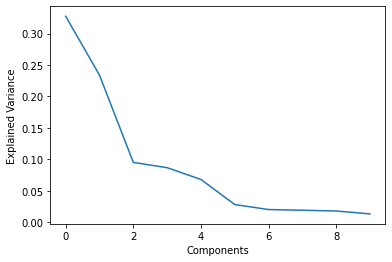

In [12]:
from sklearn.decomposition import PCA

import matplotlib.pyplot as plot

df_ = df2_features

# You must normalize the data before applying the fit method
df_normalized=(df_ - df_.mean()) / df_.std()

pca = PCA(n_components=10)
data=pca.fit_transform(df_normalized)

pca.components_

plot.plot(pca.explained_variance_ratio_)
plot.ylabel('Explained Variance')
plot.xlabel('Components')
plot.show()

In [13]:
data[:,0]

array([ -5.99546974,  -5.92080771,   3.79518063,  -5.81616674,
        -7.90720554,  -8.8077847 ,  -0.62315197,  -7.37938786,
        -8.0166874 ,  -9.14932574,   3.37375446,   2.76769737,
         7.30711601,  -0.17318798,   8.57445273,   6.31229358,
        -1.40864629,   4.9827434 ,   4.09635738,  -8.84654532,
        -8.15519316,  -7.08999776,  -8.8244425 ,  -3.07691177,
        -7.04977825,  -2.48011309,  -5.92734799,  -4.54422321,
        -0.45920578,  -6.16003936,   0.18559619,  -0.49194718,
        -2.4019877 ,  10.29613917,  10.30765473,   9.17962638,
        10.33184174,  -3.33293703,  -1.59053586,   7.45801928,
         4.21833747,  -8.80647074,   6.85362315,   3.31398827,
        -1.35633512,   0.18214502,   1.04331507,   9.11312585,
       -11.11374066,   8.49917553,   7.52078093,  -1.79905972,
         1.25074654,   9.38304892,   9.3247825 ,   8.03915026,
         6.44464356,   0.59858143,   3.73245906,   1.53972008,
        -1.91310991,   0.98299959,   2.91015199,   1.47

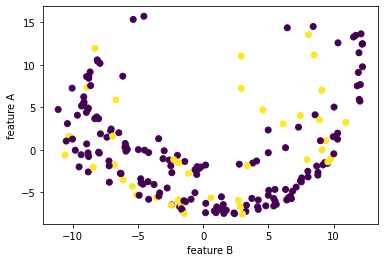

In [14]:
plot.scatter(data[:,0],data[:,1],c=df2_values)
plot.ylabel('feature A')
plot.xlabel('feature B')
plot.show()

In [15]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
from matplotlib import pyplot
# define dataset
X= df2_features
# define the model
model = Birch(threshold=0.01, n_clusters=5)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster

pyplot.show()

In [16]:
import sklearn
cosine_pairwise=sklearn.metrics.pairwise.cosine_similarity(X, Y=None, dense_output=True)

In [17]:
import seaborn as sns

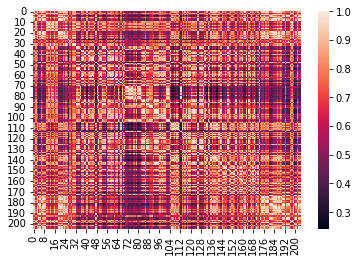

In [18]:
sns.heatmap(cosine_pairwise, annot=False)

In [27]:
def max_index(a_list,n=3):
    res = sorted(range(len(a_list)), key = lambda sub: a_list[sub])[-n:-1]
    return(res)

In [28]:
from pyvis.network import Network

net = Network(notebook=False, height="1200px", width="2800px")
for i in range(len(df2_values)): 
    if df2_values.values[i]==0:
        net.add_node(i,label=df2_labels.values[i][:7]+"_"+str(df2_values.values[i]),color="green")
    else:
        net.add_node(i,label=df2_labels.values[i][:7]+"_"+str(df2_values.values[i]),color="red")   

    
for i in range(len(df2_values)):
    mindex=max_index(cosine_pairwise[i],n=5)
    for m in mindex:
        if cosine_pairwise[i][m]>0.98:
            net.add_edge(i,m)


In [29]:
net.show('nodes.html')

In [30]:
max_index([13,4,32,2,7,32,21])

[6, 2]